## Install dan Import Library

In [ ]:
pip install matplotlib cartopy numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 32.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Weiszfield's Algorithm and $L_{q}$ Algorithm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Plot Geometric Median

### Weiszfield Algortihm

[1.00000711 1.00002811]


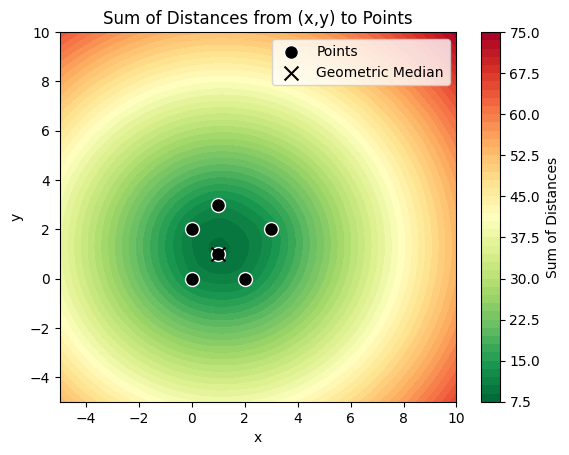

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data points

points = np.array([
    [0, 2], [0, 0], [2, 0], [1, 3], [1, 1], [3,2]
])

def weiszfeld(points, tol=1e-5, max_iter=100):
    # Initial guess for the median (mean of points)
    median = np.mean(points, axis=0)
    for _ in range(max_iter):
        distances = np.linalg.norm(points - median, axis=1)
        if np.any(distances == 0):
            return median  # Stop if any distance is zero

        weights = 1 / distances
        new_median = np.sum(weights[:, np.newaxis] * points, axis=0) / np.sum(weights)

        # Convergence check
        if np.linalg.norm(new_median - median) < tol:
            return new_median
        median = new_median
    return median

# Compute the geometric median
geom_median = weiszfeld(points)

# Define grid for contour plot
x = np.linspace(-5, 10, 100)
y = np.linspace(-5, 10, 100)
X, Y = np.meshgrid(x, y)

# Compute sum of distances from each grid point to the data points
Z = np.zeros_like(X)
for point in points:
    Z += np.sqrt((X - point[0])**2 + (Y - point[1])**2)

# Plot contour map
plt.contourf(X, Y, Z, levels=50, cmap='RdYlGn_r')
plt.colorbar(label="Sum of Distances")

# Plot points
plt.scatter(points[:, 0], points[:, 1], color="black", edgecolor="white", s=100, label="Points")

# Plot the geometric median
plt.scatter(geom_median[0], geom_median[1], color="black", s=100, marker="x", label="Geometric Median")

# Title and labels
print(geom_median)
plt.title("Sum of Distances from (x,y) to Points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()


### $L_{q}$ Algorithm

Geometric Median (Lq with q= 2.99 ): [1.70595625 5.36717565]


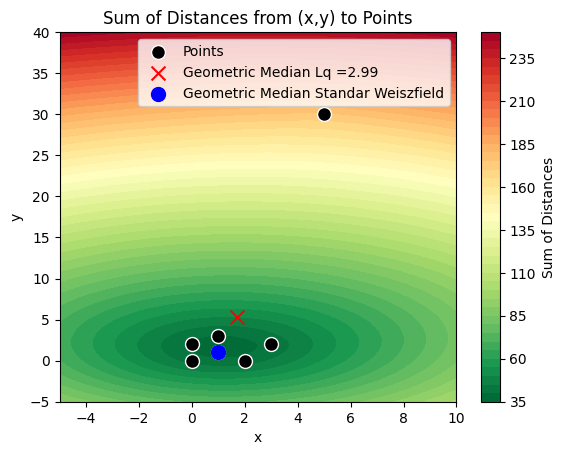

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def lq_weiszfeld(points, q=2.1, tol=1e-6, max_iter=1000):
    """
    Compute the geometric median using the Lq-norm Weiszfeld algorithm.
    Parameters:
        points (np.array): An array of shape (n, d) where n is the number of points and d is the dimension.
        q (float): The norm to be used. For example, q=1 for L1 norm, q=2 for L2 norm (Euclidean), etc.
        tol (float): Tolerance for convergence.
        max_iter (int): Maximum number of iterations.
    Returns:
        np.array: The geometric median point.
    """
    # Initialize x as the mean of the points
    x = np.mean(points, axis=0)
    for iteration in range(max_iter):
        # Compute distances with L_q norm
        distances = np.linalg.norm(points - x, ord=q, axis=1)

        # Check for convergence if all distances are close enough
        if np.all(distances < tol):
            break

        # Calculate weights as the distances raised to the power of (q - 2)
        weights = np.maximum(distances, tol)**(q - 3)  # Avoid division by zero by enforcing minimum tol

        # Update x as the weighted sum of points
        x_new = np.sum(weights[:, np.newaxis] * points, axis=0) / np.sum(weights)

        # Check if the solution has converged
        if np.linalg.norm(x_new - x, ord=q) < tol:
            x = x_new
            break

        x = x_new

    return x

# Example usage
points = np.array([
    [0, 2], [0, 0], [2, 0], [1, 3], [1, 1], [3,2], [5,30]
])

# Compute the geometric median with Lq norm, for example with q = 2
q_value=2.99
geometric_median = lq_weiszfeld(points, q=q_value)
print("Geometric Median (Lq with q=", q_value,"):", geometric_median)
# Define grid for contour plot
x = np.linspace(-5, 10, 100)
y = np.linspace(-5, 40, 100)
X, Y = np.meshgrid(x, y)

# Compute sum of distances from each grid point to the data points
Z = np.zeros_like(X)
for point in points:
    Z += np.sqrt((X - point[0])**2 + (Y - point[1])**2)

# Plot contour map
plt.contourf(X, Y, Z, levels=50, cmap='RdYlGn_r')
plt.colorbar(label="Sum of Distances")

# Plot points
plt.scatter(points[:, 0], points[:, 1], color="black", edgecolor="white", s=100, label="Points")

# Plot the geometric median
plt.scatter(geometric_median[0], geometric_median[1], color="red", s=100, marker="x", label=f'Geometric Median Lq ={q_value}')
plt.scatter(geom_median[0], geom_median[1], color="blue", s=100, marker="o", label="Geometric Median Standar Weiszfield")

# Title and labels
plt.title("Sum of Distances from (x,y) to Points")
plt.xlabel("x")
plt.ylabel("y")

plt.legend()

plt.show()

# Import Dataset Digunakan

In [ ]:
covid = pd.read_csv("/content/drive/MyDrive/Test TA/covid-19 data v2.csv")
covid

,country,code,confirmed,recovered,critical,deaths,lastChange,lastUpdate,latitude,longitude,altitude,information,altidude (m)
0,Andorra,AD,48015,47563,0,165,2024-02-11T22:05:54+00:00,2024-08-09T09:13:41+00:00,42.546245,1.601554,0.017793,NaN,1977.0
1,UAE,AE,1067030,1054525,0,2349,2024-02-11T22:01:57+00:00,2024-08-09T09:13:41+00:00,25.218247,55.242192,-0.000009,Dubai,-1.0
2,Afghanistan,AF,234174,211080,0,7996,2024-06-04T00:18:51+00:00,2024-08-09T09:13:41+00:00,33.939110,67.709953,0.033912,NaN,3768.0
3,Antigua and Barbuda,AG,9106,8954,0,146,2024-02-11T22:01:12+00:00,2024-08-09T09:13:41+00:00,17.060816,-61.796428,0.000603,NaN,67.0
4,Anguilla,AI,3904,3,0,12,2024-06-04T00:14:26+00:00,2024-08-09T09:13:41+00:00,18.216142,-63.062444,0.000216,The Valley,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,Yemen,YE,11945,9124,0,2159,2024-02-11T22:02:34+00:00,2024-08-09T09:13:41+00:00,15.552727,48.516388,0.008919,NaN,991.0
244,Mayotte,YT,42027,2964,0,188,2024-06-04T00:19:24+00:00,2024-08-09T09:13:41+00:00,-12.780176,45.227044,0.000387,Mamoudzou,43.0
245,South Africa,ZA,4076463,3912506,192,102595,2024-02-11T22:15:25+00:00,2024-08-09T09:13:41+00:00,-30.559482,22.937506,0.009963,NaN,1107.0
246,Zambia,ZM,349304,341316,0,4069,2024-06-04T00:26:18+00:00,2024-08-09T09:13:41+00:00,-13.133897,27.849332,0.010845,NaN,1205.0


In [ ]:
covid_2 = covid.loc[covid['altitude']>0]
covid_2

,country,code,confirmed,recovered,critical,deaths,lastChange,lastUpdate,latitude,longitude,altitude,information,altidude (m)
0,Andorra,AD,48015,47563,0,165,2024-02-11T22:05:54+00:00,2024-08-09T09:13:41+00:00,42.546245,1.601554,0.017793,NaN,1977.0
2,Afghanistan,AF,234174,211080,0,7996,2024-06-04T00:18:51+00:00,2024-08-09T09:13:41+00:00,33.939110,67.709953,0.033912,NaN,3768.0
3,Antigua and Barbuda,AG,9106,8954,0,146,2024-02-11T22:01:12+00:00,2024-08-09T09:13:41+00:00,17.060816,-61.796428,0.000603,NaN,67.0
4,Anguilla,AI,3904,3,0,12,2024-06-04T00:14:26+00:00,2024-08-09T09:13:41+00:00,18.216142,-63.062444,0.000216,The Valley,24.0
5,Albania,AL,334863,330233,0,3605,2024-06-04T00:27:05+00:00,2024-08-09T09:13:41+00:00,41.153332,20.168331,0.001404,NaN,156.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,Yemen,YE,11945,9124,0,2159,2024-02-11T22:02:34+00:00,2024-08-09T09:13:41+00:00,15.552727,48.516388,0.008919,NaN,991.0
244,Mayotte,YT,42027,2964,0,188,2024-06-04T00:19:24+00:00,2024-08-09T09:13:41+00:00,-12.780176,45.227044,0.000387,Mamoudzou,43.0
245,South Africa,ZA,4076463,3912506,192,102595,2024-02-11T22:15:25+00:00,2024-08-09T09:13:41+00:00,-30.559482,22.937506,0.009963,NaN,1107.0
246,Zambia,ZM,349304,341316,0,4069,2024-06-04T00:26:18+00:00,2024-08-09T09:13:41+00:00,-13.133897,27.849332,0.010845,NaN,1205.0


In [ ]:
points = covid[['country','longitude', 'latitude','altitude']]
points = points.loc[points['altitude']>0]
points

,country,longitude,latitude,altitude
0,Andorra,1.601554,42.546245,0.017793
2,Afghanistan,67.709953,33.939110,0.033912
3,Antigua and Barbuda,-61.796428,17.060816,0.000603
4,Anguilla,-63.062444,18.216142,0.000216
5,Albania,20.168331,41.153332,0.001404
...,...,...,...,...
243,Yemen,48.516388,15.552727,0.008919
244,Mayotte,45.227044,-12.780176,0.000387
245,South Africa,22.937506,-30.559482,0.009963
246,Zambia,27.849332,-13.133897,0.010845


In [ ]:
points = points[['longitude', 'latitude']].values.tolist()
points = np.array(points)
points

array([[ 1.60155400e+00,  4.25462450e+01],
       [ 6.77099530e+01,  3.39391100e+01],
       [-6.17964280e+01,  1.70608160e+01],
       [-6.30624440e+01,  1.82161420e+01],
       [ 2.01683310e+01,  4.11533320e+01],
       [ 4.50381890e+01,  4.00690990e+01],
       [ 1.78738870e+01, -1.12026920e+01],
       [ 1.66624024e+02, -7.78426950e+01],
       [-6.36166720e+01, -3.84160970e+01],
       [ 1.45500720e+01,  4.75162310e+01],
       [ 1.33775136e+02, -2.52743980e+01],
       [-7.00367920e+01,  1.25190400e+01],
       [ 1.76790760e+01,  4.39158860e+01],
       [-5.95431980e+01,  1.31938870e+01],
       [ 9.03563310e+01,  2.36849940e+01],
       [ 4.46993600e+00,  5.05038870e+01],
       [-1.56159300e+00,  1.22383330e+01],
       [ 2.54858300e+01,  4.27338830e+01],
       [ 2.99188860e+01, -3.37305600e+00],
       [ 2.31583400e+00,  9.30769000e+00],
       [-6.28524910e+01,  1.78968420e+01],
       [-6.47533700e+01,  3.23094660e+01],
       [ 1.14727669e+02,  4.53527700e+00],
       [-6.

In [ ]:
weights = (covid_2['deaths'].values)/(covid_2['confirmed'].values)*100
weights

array([ 0.34364261,  3.41455499,  1.60333846,  0.30737705,  1.07655967,
        1.94254046,  1.80476488,  0.        ,  1.29176624,  0.37067811,
        0.20597067,  0.66027496,  4.06030499,  0.58601168,  1.43912028,
        0.7070785 ,  1.8088089 ,  2.89196336,  0.06944318,  0.58139535,
        0.10895224,  0.87486744,  0.06546045,  1.84856257,  1.83610754,
        2.21615377,  0.03349443,  0.84715006,  0.71606992,  0.96346399,
        1.19354884,  1.47778292,  0.73186528,  1.52118227,  0.32454139,
        0.94474113,  0.02776621,  1.19774857,  1.57442634,  1.04748243,
        2.23743952,  0.7610081 ,  0.76485024,  0.64149959,  0.20040816,
        0.91440692,  0.47136682,  1.20458891,  0.26031976,  0.46140417,
        0.64862626,  2.52968641,  3.36791293,  0.47781298,  4.80618112,
       10.        ,  0.87503883,  1.51130285,  0.78872541,  1.28043752,
        0.08078943,  0.41765823,  0.62587919,  0.93178801,  0.9202515 ,
        0.4283922 ,  0.8505489 ,  0.54987835,  0.17542394,  2.94

# Titik Median Tunggal

### Algoritma Weiszfeld

Geometric Median standard: [13.36025066 24.86685879]


/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWar

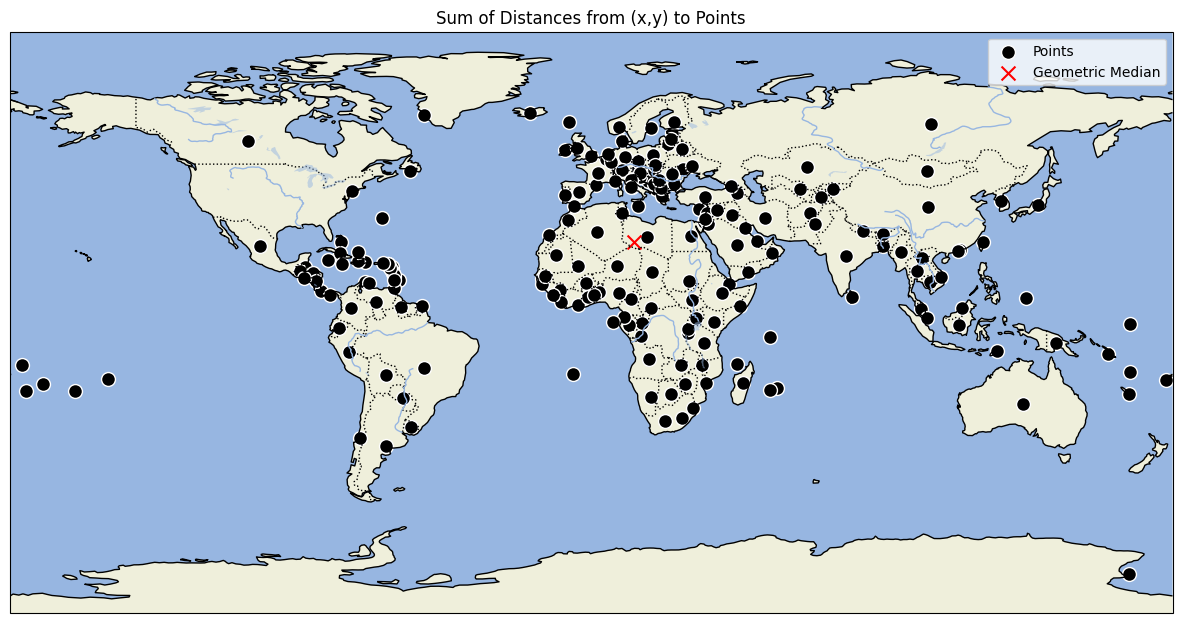

In [ ]:
def weiszfeld(points, tol=1e-5, max_iter=100):
    # Initial guess for the median (mean of points)
    median = np.mean(points, axis=0)
    for _ in range(max_iter):
        distances = np.linalg.norm(points - median, axis=1)
        if np.any(distances == 0):
            return median  # Stop if any distance is zero

        weights = 1 / distances
        new_median = np.sum(weights[:, np.newaxis] * points, axis=0) / np.sum(weights)

        # Convergence check
        if np.linalg.norm(new_median - median) < tol:
            return new_median
        median = new_median
    return median

# Compute the geometric median
geom_median = weiszfeld(points)

print("Geometric Median standard:", geom_median)
# Define grid for contour plot
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.set_global()


# Plot points
plt.scatter(points[:, 0], points[:, 1], color="black", edgecolor="white", s=100, label="Points")

# Plot the geometric median
plt.scatter(geom_median[0], geom_median[1], color="red", s=100, marker="x", label="Geometric Median")
# Title and labels
plt.title("Sum of Distances from (x,y) to Points")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### Algoritma $L_q$ Weiszfeld

Geometric Median (Lq with q=2.99): [10.53987654 18.73823977]
Geometric Median Standard [13.36025066 24.86685879]


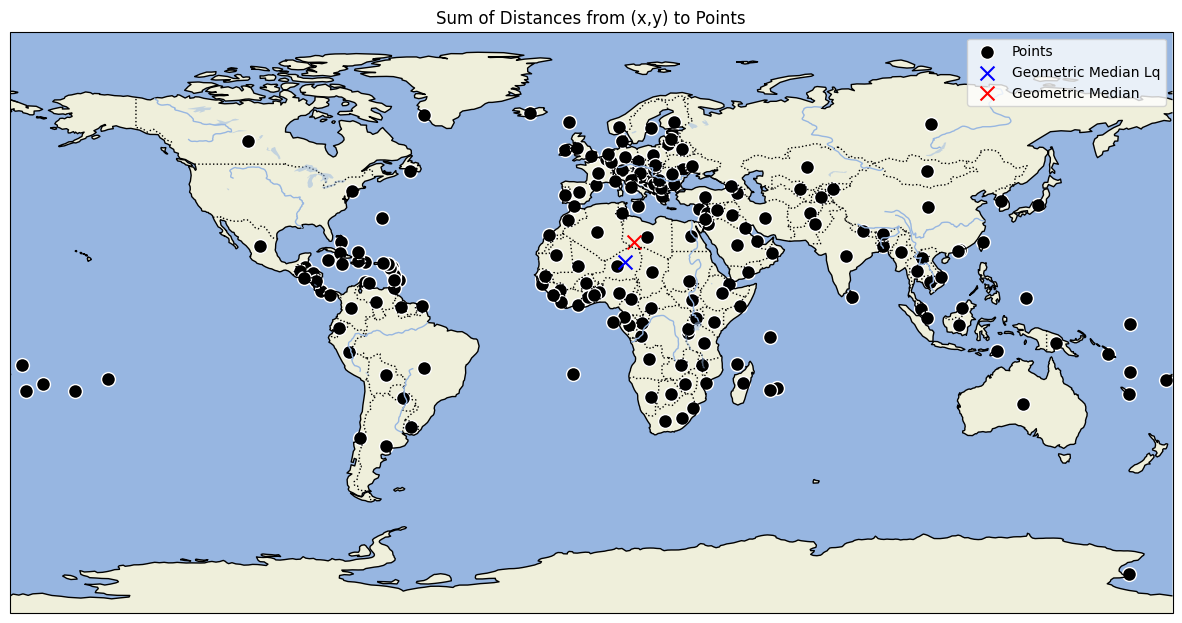

In [ ]:
def lq_weiszfeld(points, q=2.99, tol=1e-6, max_iter=1000):
    """
    Compute the geometric median using the Lq-norm Weiszfeld algorithm.

    Parameters:
        points (np.array): An array of shape (n, d) where n is the number of points and d is the dimension.
        q (float): The norm to be used. For example, q=1 for L1 norm, q=2 for L2 norm (Euclidean), etc.
        tol (float): Tolerance for convergence.
        max_iter (int): Maximum number of iterations.

    Returns:
        np.array: The geometric median point.
    """
    # Initialize x as the mean of the points
    x = np.mean(points, axis=0)

    for iteration in range(max_iter):
        # Compute distances with L_q norm
        distances = np.linalg.norm(points - x, ord=q, axis=1)

        # Check for convergence if all distances are close enough
        if np.all(distances < tol):
            break

        # Calculate weights as the distances raised to the power of (q - 2)
        weights = np.maximum(distances, tol)**(q - 3)  # Avoid division by zero by enforcing minimum tol

        # Update x as the weighted sum of points
        x_new = np.sum(weights[:, np.newaxis] * points, axis=0) / np.sum(weights)

        # Check if the solution has converged
        if np.linalg.norm(x_new - x, ord=q) < tol:
            x = x_new
            break

        x = x_new

    return x

# Compute the geometric median with Lq norm, for example with q = 2
q_value=2.99
geometric_median = lq_weiszfeld(points, q=q_value)
print(f'Geometric Median (Lq with q={q_value}):', geometric_median)
print("Geometric Median Standard", geom_median)

plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.set_global()

# Plot points
plt.scatter(points[:, 0], points[:, 1], color="black", edgecolor="white", s=100, label="Points")

# Plot the geometric median
plt.scatter(geometric_median[0], geometric_median[1], color="blue", s=100, marker="x", label="Geometric Median Lq")
plt.scatter(geom_median[0], geom_median[1], color="red", s=100, marker="x", label="Geometric Median")
plt.title("Sum of Distances from (x,y) to Points")
plt.xlabel("x")
plt.ylabel("y")

plt.legend()

plt.show()

### Membandingkan Kedua Titik $L_q$

Geometric Median (Lq with q=2.99): [10.53987654 18.73823977]


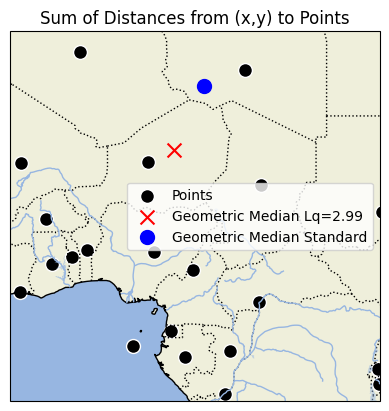

In [ ]:
def lq_weiszfeld(points, q=2.1, tol=1e-6, max_iter=1000):
    """
    Compute the geometric median using the Lq-norm Weiszfeld algorithm.

    Parameters:
        points (np.array): An array of shape (n, d) where n is the number of points and d is the dimension.
        q (float): The norm to be used. For example, q=1 for L1 norm, q=2 for L2 norm (Euclidean), etc.
        tol (float): Tolerance for convergence.
        max_iter (int): Maximum number of iterations.

    Returns:
        np.array: The geometric median point.
    """
    # Initialize x as the mean of the points
    x = np.mean(points, axis=0)

    for iteration in range(max_iter):
        # Compute distances with L_q norm
        distances = np.linalg.norm(points - x, ord=q, axis=1)

        # Check for convergence if all distances are close enough
        if np.all(distances < tol):
            break

        # Calculate weights as the distances raised to the power of (q - 2)
        weights = np.maximum(distances, tol)**(q - 3)  # Avoid division by zero by enforcing minimum tol

        # Update x as the weighted sum of points
        x_new = np.sum(weights[:, np.newaxis] * points, axis=0) / np.sum(weights)

        # Check if the solution has converged
        if np.linalg.norm(x_new - x, ord=q) < tol:
            x = x_new
            break

        x = x_new

    return x

# Compute the geometric median with Lq norm, for example with q = 2
q_value_1=2.99

geometric_median_1 = lq_weiszfeld(points, q=q_value_1)

print("Geometric Median (Lq with q=2.99):", geometric_median_1)


ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.set_global()
# Plot points
plt.scatter(points[:, 0], points[:, 1], color="black", edgecolor="white", s=100, label="Points")

# Plot the geometric median
plt.scatter(geometric_median_1[0], geometric_median_1[1], color="red", s=100, marker="x", label="Geometric Median Lq=2.99")
plt.scatter(geom_median[0], geom_median[1], color="blue", s=100, marker="o", label="Geometric Median Standard")
plt.title("Sum of Distances from (x,y) to Points")
plt.xlim(-5,30)
plt.ylim(-5,30)
plt.xlabel("x")
plt.ylabel("y")

plt.legend()

plt.show()

### Perbedaan Jarak

In [ ]:
x,y = geom_median
x1, y1 = geometric_median
absolute_error = np.sqrt((x - x1)**2 + (y - y1)**2)

print(f"Absolute Error/Uncertainty between Standard and Lq Weiszfeld: {absolute_error:.6f}")

Absolute Error/Uncertainty between Standard and Lq Weiszfeld: 6.165593


### Kasus Berbobot

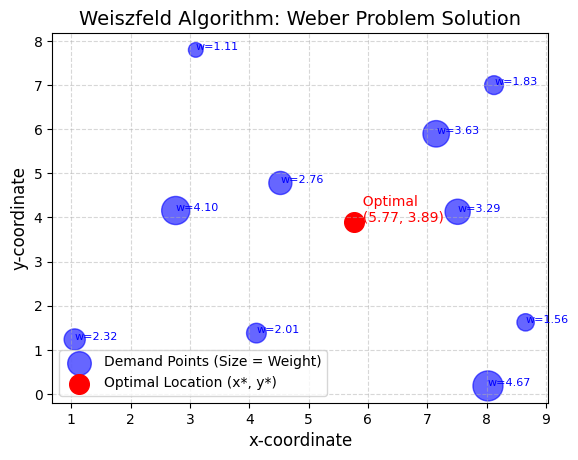

In [ ]:
import numpy as np

# Data
x_i = np.array([1.05673, 3.09771, 4.12017, 8.65859, 2.75993, 4.52411, 7.51297, 8.02419, 7.15113, 8.12651])
y_i = np.array([1.23461, 7.79647, 1.37869, 1.62263, 4.15701, 4.78127, 4.12829, 0.18183, 5.89541, 6.99807])
w_i = np.array([2.317812, 1.111324, 2.006548, 1.558396, 4.099892, 2.763484, 3.286868, 4.671036, 3.629172, 1.830044])

# Initial location (weighted average)
x_prev = np.sum(w_i * x_i) / np.sum(w_i)
y_prev = np.sum(w_i * y_i) / np.sum(w_i)

# Convergence threshold
epsilon = 1e-6
max_iter = 1000  # Maximum iterations to avoid infinite loops
iteration = 0

while iteration < max_iter:
    # Compute weighted distances
    distances = np.sqrt((x_prev - x_i)**2 + (y_prev - y_i)**2)
    # Avoid division by zero
    distances[distances == 0] = epsilon

    # Compute updated weights
    w_hat = w_i / distances

    # Update x and y
    x_new = np.sum(w_hat * x_i) / np.sum(w_hat)
    y_new = np.sum(w_hat * y_i) / np.sum(w_hat)

    # Check for convergence
    if np.sqrt((x_new - x_prev)**2 + (y_new - y_prev)**2) < epsilon:
        break

    # Update for next iteration
    x_prev, y_prev = x_new, y_new
    iteration += 1

plt.scatter(x_i, y_i, s=w_i * 100, color='blue', alpha=0.6, label='Demand Points (Size = Weight)')
for i in range(len(x_i)):
    plt.text(x_i[i], y_i[i], f'w={w_i[i]:.2f}', fontsize=8, color='blue')

# Plot the optimal location
plt.scatter(x_new, y_new, color='red', s=200, label='Optimal Location (x*, y*)')
plt.text(x_new, y_new, f'  Optimal\n  ({x_new:.2f}, {y_new:.2f})', fontsize=10, color='red')

# Add grid, labels, and legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlabel('x-coordinate', fontsize=12)
plt.ylabel('y-coordinate', fontsize=12)
plt.title('Weiszfeld Algorithm: Weber Problem Solution', fontsize=14)
plt.legend()
plt.show()


Converged after 30 iterations.
Geometric Median [15.80111441 19.20499291]


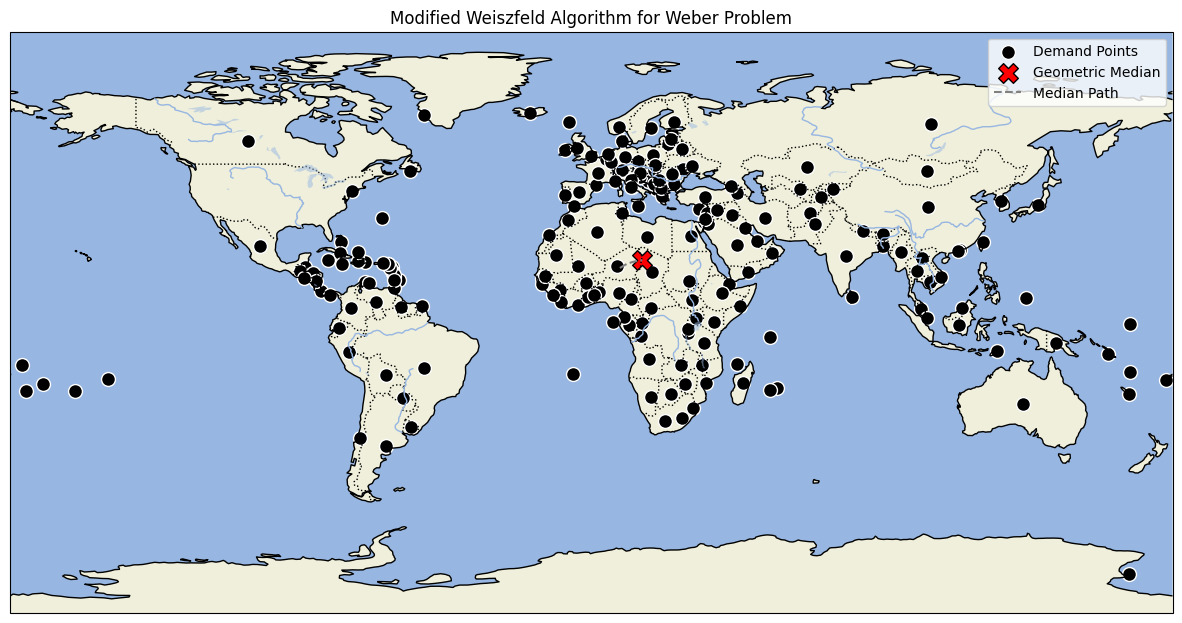

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def weiszfeld_weber(points, weights=None, tol=1e-6, max_iter=1000):
    """
    Modified Weiszfeld algorithm for solving the Weber problem.

    Parameters:
    - points: np.ndarray of shape (n, 2), coordinates of the demand points.
    - weights: np.ndarray of shape (n,), weights for each point. If None, all weights are set to 1.
    - tol: Convergence tolerance.
    - max_iter: Maximum number of iterations.

    Returns:
    - x: np.ndarray of shape (2,), the geometric median.
    - history: List of median positions for visualization.
    """
    # Initialize weights to 1 if not provided
    if weights is None:
        weights = np.ones(len(points))

    # Initial guess for the median (center of gravity)
    x = np.average(points, axis=0, weights=weights)
    history = [x]  # To store the history of median updates

    for iteration in range(max_iter):
        # Compute distances from the current median to all points
        distances = np.linalg.norm(points - x, axis=1)

        # Avoid division by zero (very close points)
        distances[distances == 0] = 1e-10

        # Compute weighted distances (w_i / d_i)
        weighted_distances = weights / distances

        # Update the median
        new_x = np.sum(weighted_distances[:, None] * points, axis=0) / np.sum(weighted_distances)

        # Store the updated median
        history.append(new_x)

        # Check for convergence
        if np.linalg.norm(new_x - x) < tol:
            print(f"Converged after {iteration + 1} iterations.")
            break

        x = new_x

    return x, history

# Example points and weights

# Solve the Weber problem using the modified Weiszfeld algorithm
geometric_median, history = weiszfeld_weber(points, weights)

# Extract the history of medians
history = np.array(history)


# Plotting
plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
ax.set_global()
# Plot the original points
plt.scatter(points[:, 0], points[:, 1], color='black', edgecolor='white', label='Demand Points', s=100)

# Plot the geometric median
plt.scatter(geometric_median[0], geometric_median[1], color='red', s=200, label='Geometric Median', edgecolor='black', marker='X')

# Plot the history of medians
plt.plot(history[:, 0], history[:, 1], linestyle='--', color='gray', label='Median Path')

#Titik lokasi median geometris
print("Geometric Median", geometric_median)

# Add labels and legend
plt.title('Modified Weiszfeld Algorithm for Weber Problem')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


# Titik Median Tidak Tunggal

### Algoritma Weiszfeld

Hard Clustering

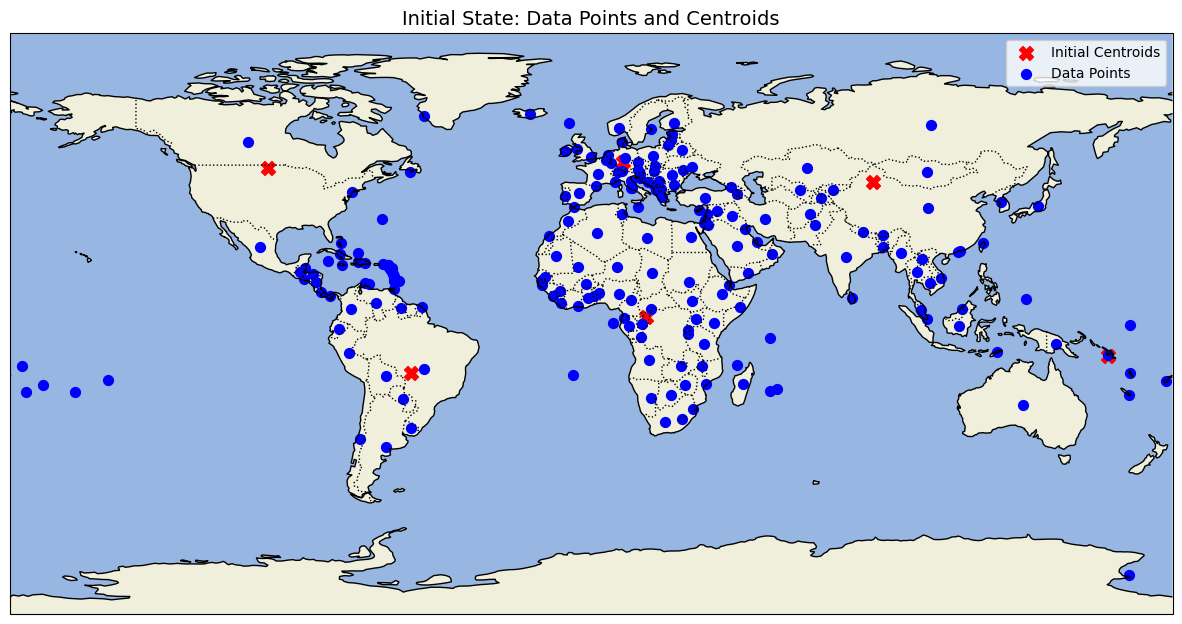

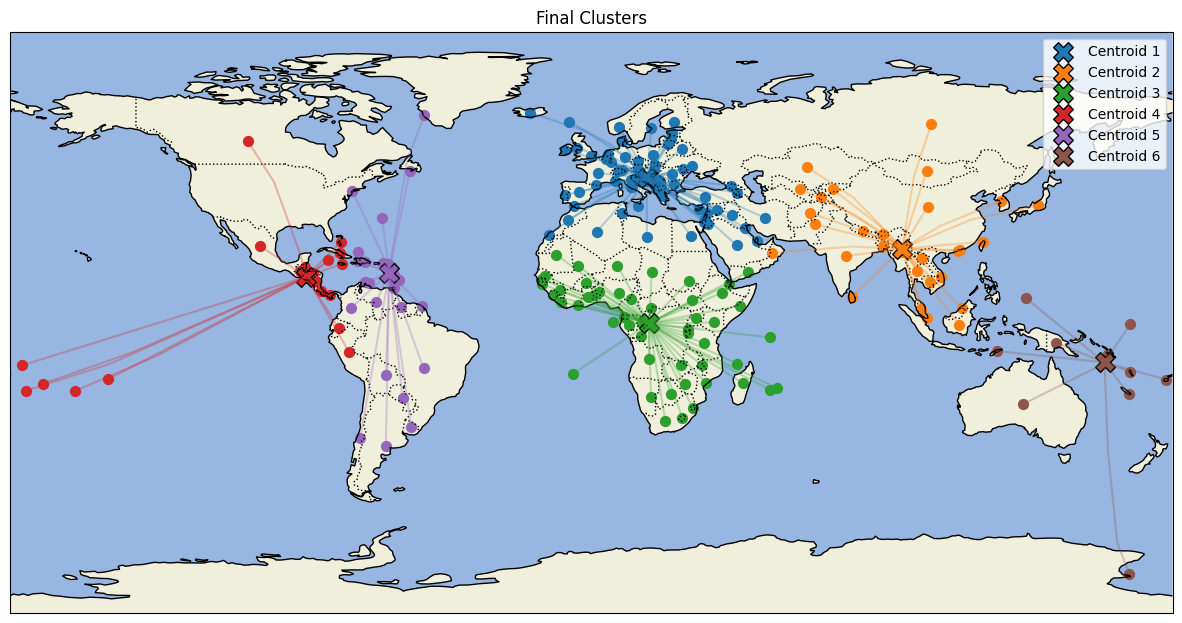

Optimized Centroids:
Centroid 1: (17.194050, 44.639376)
Centroid 2: (96.217945, 22.732798)
Centroid 3: (17.859407, -0.302758)
Centroid 4: (-88.204489, 14.136199)
Centroid 5: (-62.566541, 15.364049)
Centroid 6: (158.942050, -12.400236)

Point Assignments:
Point 1: [ 1.601554 42.546245] -> Centroid 1
Point 2: [67.709953 33.93911 ] -> Centroid 2
Point 3: [-61.796428  17.060816] -> Centroid 5
Point 4: [-63.062444  18.216142] -> Centroid 5
Point 5: [20.168331 41.153332] -> Centroid 1
Point 6: [45.038189 40.069099] -> Centroid 1
Point 7: [ 17.873887 -11.202692] -> Centroid 3
Point 8: [166.624024 -77.842695] -> Centroid 6
Point 9: [-63.616672 -38.416097] -> Centroid 5
Point 10: [14.550072 47.516231] -> Centroid 1
Point 11: [133.775136 -25.274398] -> Centroid 6
Point 12: [-70.036792  12.51904 ] -> Centroid 5
Point 13: [17.679076 43.915886] -> Centroid 1
Point 14: [-59.543198  13.193887] -> Centroid 5
Point 15: [90.356331 23.684994] -> Centroid 2
Point 16: [ 4.469936 50.503887] -> Centroid 1
Po

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def euclidean_distance(p1, p2):
    """Calculate Euclidean distance between two points"""
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def weiszfeld_multi_facility(points, weights, initial_centroids, max_iter=1000, tol=1e-6):
    """
    Weiszfeld algorithm for multi-facility location problem using Euclidean distance

    Parameters:
    - points: list of (latitude, longitude) tuples
    - weights: list of weights for each point
    - initial_centroids: list of initial (latitude, longitude) centroids
    - max_iter: maximum number of iterations
    - tol: convergence tolerance

    Returns:
    - optimized centroids
    - cluster assignments
    - matplotlib figure with visualization
    """
    K = len(initial_centroids)
    N = len(points)
    centroids = initial_centroids.copy()

    # Create a figure for initial visualization
    fig1 = plt.figure(figsize=(15, 10))
    ax1 = plt.axes(projection=ccrs.PlateCarree())
    ax1.add_feature(cfeature.LAND)
    ax1.add_feature(cfeature.OCEAN)
    ax1.add_feature(cfeature.COASTLINE)
    ax1.add_feature(cfeature.BORDERS, linestyle=':')
    ax1.set_global()

    # Plot initial state
    initial_lons, initial_lats = zip(*initial_centroids)
    ax1.scatter(initial_lons, initial_lats, color='red', s=100,
               marker='X', label='Initial Centroids', transform=ccrs.PlateCarree())

    point_lons, point_lats = zip(*points)
    ax1.scatter(point_lons, point_lats, color='blue', s=50,
               label='Data Points', transform=ccrs.PlateCarree())

    plt.title('Initial State: Data Points and Centroids', fontsize=14)
    plt.legend()
    plt.show()

    # Main algorithm
    for iteration in range(max_iter):
        # Assignment step
        clusters = [[] for _ in range(K)]
        assignments = []

        for i in range(N):
            distances = [euclidean_distance(points[i], c) for c in centroids]
            cluster_idx = np.argmin(distances)
            clusters[cluster_idx].append(i)
            assignments.append(cluster_idx)

        # Update step
        new_centroids = []
        for k in range(K):
            cluster_points = [points[i] for i in clusters[k]]
            cluster_weights = [weights[i] for i in clusters[k]]

            if not cluster_points:  # empty cluster
                new_centroids.append(centroids[k])
                continue

            current_centroid = centroids[k]
            is_data_point = any(np.allclose(current_centroid, p) for p in cluster_points)

            if is_data_point:
                idx = next(i for i, p in enumerate(cluster_points)
                          if np.allclose(current_centroid, p))

                # Calculate resultant force R^j
                R_lat = 0.0
                R_lon = 0.0
                for i, (lat, lon) in enumerate(cluster_points):
                    if i == idx:
                        continue
                    dist = euclidean_distance((lat, lon), current_centroid)
                    if dist > 0:
                        weight = cluster_weights[i] / dist
                        R_lat += weight * (lat - current_centroid[0])
                        R_lon += weight * (lon - current_centroid[1])

                R_norm = np.sqrt(R_lat**2 + R_lon**2)
                w_j = cluster_weights[idx]

                if R_norm > w_j:
                    # Move in direction of R
                    step_size = (R_norm - w_j) / R_norm
                    new_lat = current_centroid[0] + step_size * R_lat
                    new_lon = current_centroid[1] + step_size * R_lon
                    new_centroids.append((new_lat, new_lon))
                else:
                    # Optimal is at this data point
                    new_centroids.append(current_centroid)
            else:
                # Regular Weiszfeld update
                sum_weights = 0.0
                sum_lat = 0.0
                sum_lon = 0.0

                for i, (lat, lon) in enumerate(cluster_points):
                    dist = euclidean_distance((lat, lon), current_centroid)
                    if dist > 0:
                        weight = cluster_weights[i] / dist
                        sum_weights += weight
                        sum_lat += weight * lat
                        sum_lon += weight * lon

                if sum_weights > 0:
                    new_lat = sum_lat / sum_weights
                    new_lon = sum_lon / sum_weights
                    new_centroids.append((new_lat, new_lon))
                else:
                    new_centroids.append(current_centroid)

        # Check for convergence
        converged = True
        for k in range(K):
            dist = euclidean_distance(centroids[k], new_centroids[k])
            if dist > tol:
                converged = False
                break

        centroids = new_centroids
        if converged:
            break

    # Create final visualization
    fig2 = plt.figure(figsize=(15, 10))
    ax2 = plt.axes(projection=ccrs.PlateCarree())
    ax2.add_feature(cfeature.LAND)
    ax2.add_feature(cfeature.OCEAN)
    ax2.add_feature(cfeature.COASTLINE)
    ax2.add_feature(cfeature.BORDERS, linestyle=':')
    ax2.set_global()

    # Color palette for clusters
    colors = plt.cm.tab10.colors

    # Plot data points with cluster colors
    point_lons, point_lats = zip(*points)
    for i, (lon, lat) in enumerate(zip(point_lons, point_lats)):
        ax2.scatter(lon, lat, color=colors[assignments[i] % len(colors)],
                   s=50, transform=ccrs.PlateCarree())

    # Plot final centroids
    centroid_lons, centroid_lats = zip(*centroids)
    for k, (lon, lat) in enumerate(zip(centroid_lons, centroid_lats)):
        ax2.scatter(lon, lat, color=colors[k % len(colors)], s=200,
                   marker='X', edgecolor='black', linewidth=1,
                   label=f'Centroid {k+1}', transform=ccrs.PlateCarree())

    # Draw lines from points to their centroids
    for i, (point, assign) in enumerate(zip(points, assignments)):
        centroid = centroids[assign]
        ax2.plot([point[0], centroid[0]], [point[1], centroid[1]],
                color=colors[assign % len(colors)], alpha=0.3,
                transform=ccrs.Geodetic())

    plt.title(f'Final Clusters')
    plt.legend()
    plt.show()

    return centroids, assignments

# Assuming equal weights for all points
weights = [1.0]*len(points)
# Initial centroids
initial_centroids = [
    (9.90205525,49.84300044),   # c1
    (87.33110993,43.68111316),  # c2
    (17.05291,2.07035),         # c3
    (-100.1666667,48.1666667),  # c4
    (-55.75,-15.4608333),        # c5
    (160,-10)
]

# Run the algorithm with visualization
optimized_centroids, assignments = weiszfeld_multi_facility(points, weights, initial_centroids)

# Print results
print("Optimized Centroids:")
for i, (lat, lon) in enumerate(optimized_centroids):
    print(f"Centroid {i+1}: ({lat:.6f}, {lon:.6f})")

print("\nPoint Assignments:")
for i, (point, assign) in enumerate(zip(points, assignments)):
    print(f"Point {i+1}: {point} -> Centroid {assign+1}")

# Calculate and print total weighted distance
total_distance = 0.0
for i, point in enumerate(points):
    centroid = optimized_centroids[assignments[i]]
    dist = euclidean_distance(point, centroid)
    total_distance += weights[i] * dist
print(f"\nTotal Weighted Distance: {total_distance:.4f}")

Probabilistic Assignments

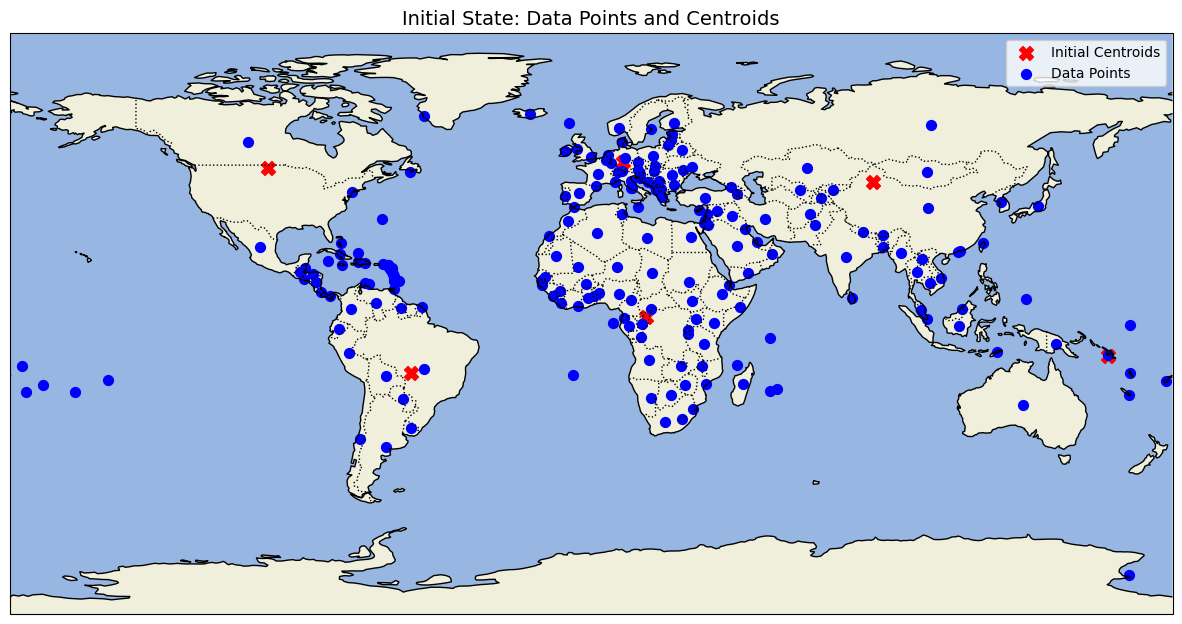

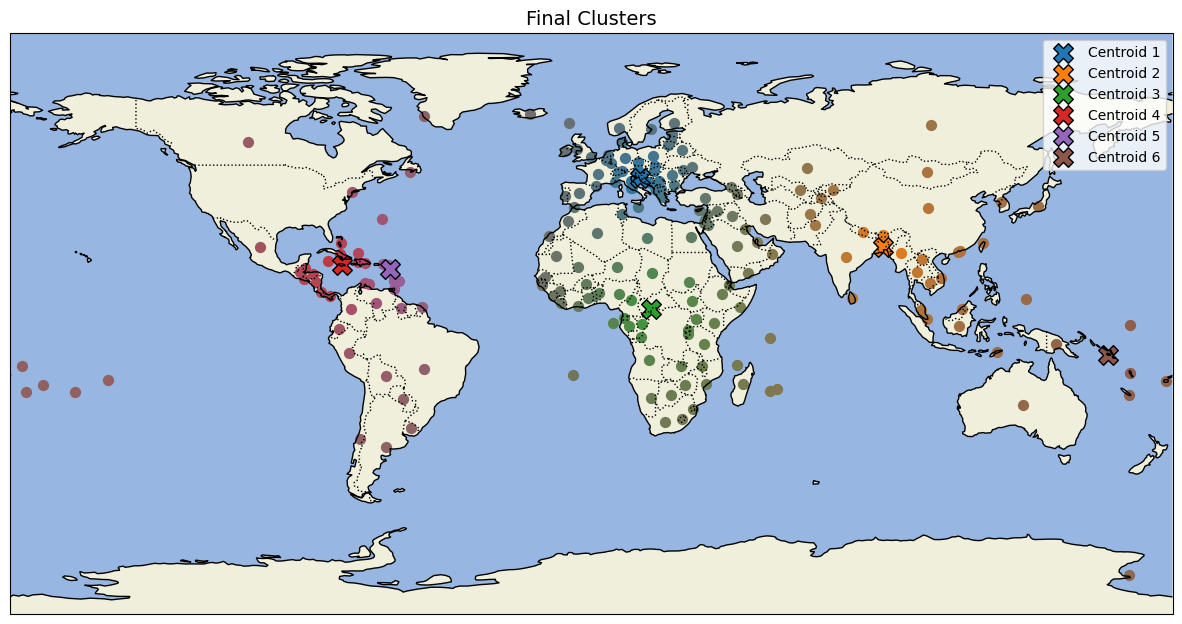

Optimized Centroids:
Centroid 1: (15.200015, 45.100006)
Centroid 2: (90.356331, 23.684994)
Centroid 3: (18.556081, 4.349485)
Centroid 4: (-77.297508, 18.109581)
Centroid 5: (-62.220998, 16.767411)
Centroid 6: (160.155601, -9.645903)

Cluster Membership Probabilities:

Point 1: [ 1.601554 42.546245]
  Probability for Centroid 1: 0.5168
  Probability for Centroid 2: 0.0788
  Probability for Centroid 3: 0.1711
  Probability for Centroid 4: 0.0866
  Probability for Centroid 5: 0.1039
  Probability for Centroid 6: 0.0428

Point 2: [67.709953 33.93911 ]
  Probability for Centroid 1: 0.1853
  Probability for Centroid 2: 0.4000
  Probability for Centroid 3: 0.1733
  Probability for Centroid 4: 0.0682
  Probability for Centroid 5: 0.0759
  Probability for Centroid 6: 0.0973

Point 3: [-61.796428  17.060816]
  Probability for Centroid 1: 0.0060
  Probability for Centroid 2: 0.0032
  Probability for Centroid 3: 0.0060
  Probability for Centroid 4: 0.0316
  Probability for Centroid 5: 0.9510
  Pro

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def euclidean_distance(p1, p2):
    """Calculate Euclidean distance between two points"""
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def calculate_probabilities(points, centroids):
    """
    Calculate cluster membership probabilities for each point
    according to equation (9) in the screenshot
    """
    K = len(centroids)
    N = len(points)
    probabilities = np.zeros((N, K))

    for i in range(N):
        distances = [euclidean_distance(points[i], c) for c in centroids]

        # Handle case where a point coincides with a centroid
        if min(distances) < 1e-10:
            probabilities[i] = np.zeros(K)
            probabilities[i][np.argmin(distances)] = 1.0
            continue

        denominator = 0.0
        numerators = []

        for k in range(K):
            # Calculate numerator: product of distances to other centroids
            numerator = 1.0
            for j in range(K):
                if j != k:
                    numerator *= euclidean_distance(points[i], centroids[j])
            numerators.append(numerator)
            denominator += numerator

        for k in range(K):
            probabilities[i, k] = numerators[k] / denominator

    return probabilities

def probabilistic_weiszfeld(points, weights, initial_centroids, max_iter=1000, tol=1e-6):
    """
    Probabilistic Weiszfeld algorithm with soft assignments

    Parameters:
    - points: list of (latitude, longitude) tuples
    - weights: list of weights for each point
    - initial_centroids: list of initial (latitude, longitude) centroids
    - max_iter: maximum number of iterations
    - tol: convergence tolerance

    Returns:
    - optimized centroids
    - probability matrix
    - matplotlib figure with visualization
    """
    K = len(initial_centroids)
    N = len(points)
    centroids = initial_centroids.copy()

    # Create a figure for initial visualization
    fig1 = plt.figure(figsize=(15, 10))
    ax1 = plt.axes(projection=ccrs.PlateCarree())
    ax1.add_feature(cfeature.LAND)
    ax1.add_feature(cfeature.OCEAN)
    ax1.add_feature(cfeature.COASTLINE)
    ax1.add_feature(cfeature.BORDERS, linestyle=':')
    ax1.set_global()

    # Plot initial state
    initial_lons, initial_lats = zip(*initial_centroids)
    ax1.scatter(initial_lons, initial_lats, color='red', s=100,
               marker='X', label='Initial Centroids', transform=ccrs.PlateCarree())

    point_lons, point_lats = zip(*points)
    ax1.scatter(point_lons, point_lats, color='blue', s=50,
               label='Data Points', transform=ccrs.PlateCarree())

    plt.title('Initial State: Data Points and Centroids', fontsize=14)
    plt.legend()
    plt.show()

    # Main algorithm
    for iteration in range(max_iter):
        # Calculate probabilities for current centroids
        probabilities = calculate_probabilities(points, centroids)

        # Update centroids
        new_centroids = []
        for k in range(K):
            numerator_lat = 0.0
            numerator_lon = 0.0
            denominator = 0.0

            for i in range(N):
                dist = euclidean_distance(points[i], centroids[k])
                if dist > 1e-10:  # avoid division by zero
                    weight = weights[i] * probabilities[i, k]**2 / dist
                    numerator_lat += weight * points[i][0]
                    numerator_lon += weight * points[i][1]
                    denominator += weight

            if denominator > 0:
                new_lat = numerator_lat / denominator
                new_lon = numerator_lon / denominator
                new_centroids.append((new_lat, new_lon))
            else:
                new_centroids.append(centroids[k])

        # Check for convergence
        converged = True
        for k in range(K):
            dist = euclidean_distance(centroids[k], new_centroids[k])
            if dist > tol:
                converged = False
                break

        centroids = new_centroids
        if converged:
            break

    # Final probability calculation
    probabilities = calculate_probabilities(points, centroids)

    # Create final visualization
    fig2 = plt.figure(figsize=(15, 10))
    ax2 = plt.axes(projection=ccrs.PlateCarree())
    ax2.add_feature(cfeature.LAND)
    ax2.add_feature(cfeature.OCEAN)
    ax2.add_feature(cfeature.COASTLINE)
    ax2.add_feature(cfeature.BORDERS, linestyle=':')
    ax2.set_global()

    # Color palette for clusters
    colors = plt.cm.tab10.colors

    # Plot data points with blended colors based on probabilities
    point_lons, point_lats = zip(*points)
    for i, (lon, lat) in enumerate(zip(point_lons, point_lats)):
        # Blend colors based on probabilities
        color = np.zeros(3)
        for k in range(K):
            color += np.array(colors[k % len(colors)][:3]) * probabilities[i, k]
        ax2.scatter(lon, lat, color=color, s=50, transform=ccrs.PlateCarree())

    # Plot final centroids
    centroid_lons, centroid_lats = zip(*centroids)
    for k, (lon, lat) in enumerate(zip(centroid_lons, centroid_lats)):
        ax2.scatter(lon, lat, color=colors[k % len(colors)], s=200,
                   marker='X', edgecolor='black', linewidth=1,
                   label=f'Centroid {k+1}', transform=ccrs.PlateCarree())

    plt.title(f'Final Clusters', fontsize=14)
    plt.legend()
    plt.show()

    return centroids, probabilities

# Given data points (latitude, longitude)

# Assuming equal weights for all points
weights = [1.0] * len(points)
# Initial centroids
initial_centroids = [
    (9.90205525,49.84300044),   # c1
    (87.33110993,43.68111316),  # c2
    (17.05291,2.07035),         # c3
    (-100.1666667,48.1666667),  # c4
    (-55.75,-15.4608333),        # c5
    (160,-10)
]

# Run the algorithm with visualization
optimized_centroids, probabilities = probabilistic_weiszfeld(points, weights, initial_centroids)

# Print results
print("Optimized Centroids:")
for i, (lat, lon) in enumerate(optimized_centroids):
    print(f"Centroid {i+1}: ({lat:.6f}, {lon:.6f})")

print("\nCluster Membership Probabilities:")
for i in range(len(points)):
    print(f"\nPoint {i+1}: {points[i]}")
    for k in range(len(optimized_centroids)):
        print(f"  Probability for Centroid {k+1}: {probabilities[i, k]:.4f}")

# Calculate and print total weighted distance
total_distance = 0.0
for i in range(len(points)):
    for k in range(len(optimized_centroids)):
        dist = euclidean_distance(points[i], optimized_centroids[k])
        total_distance += weights[i] * probabilities[i, k]**2 * dist
print(f"\nTotal Weighted Distance: {total_distance:.4f}")

Plot Lengkap dengan Diagram dan Grafik

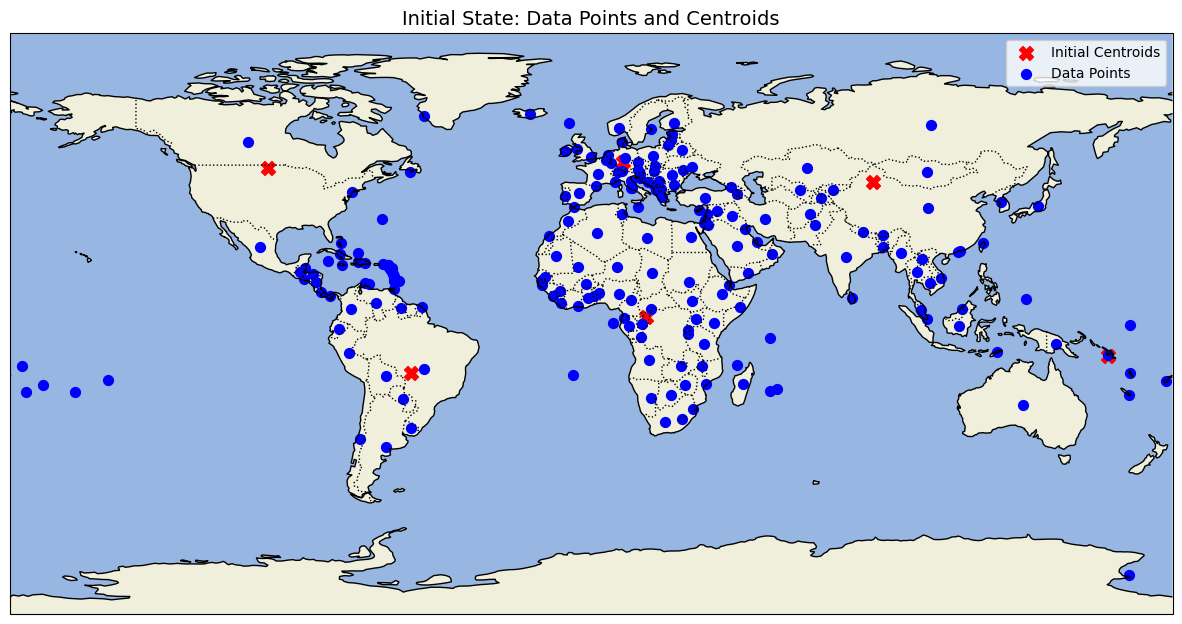

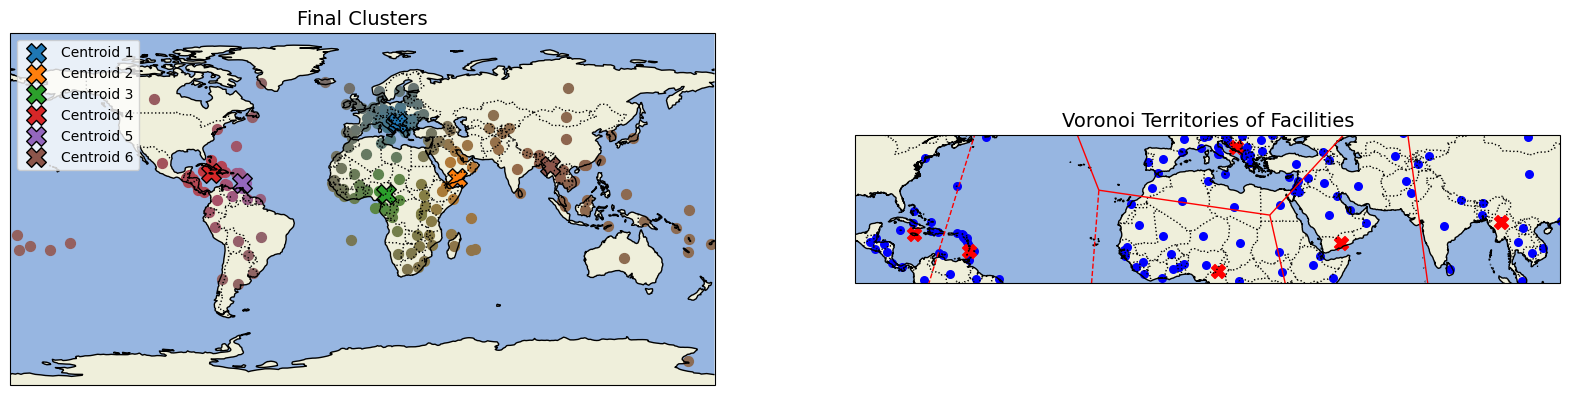

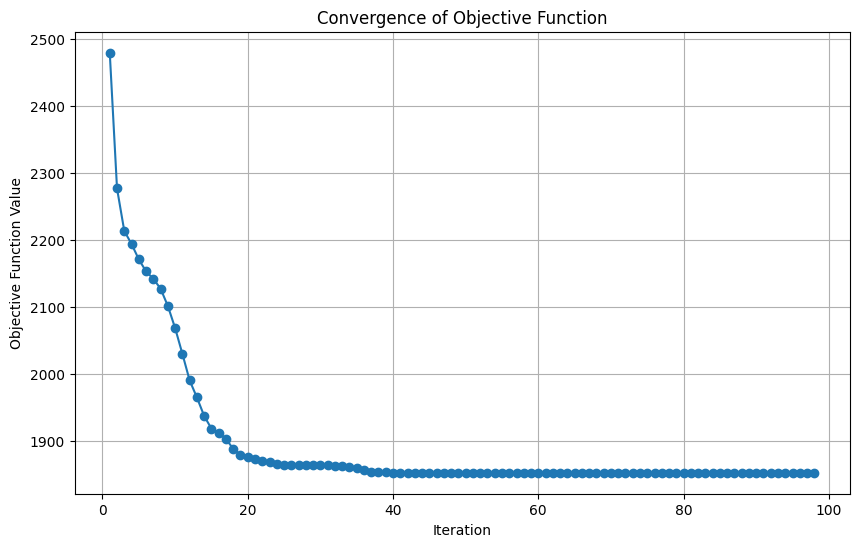

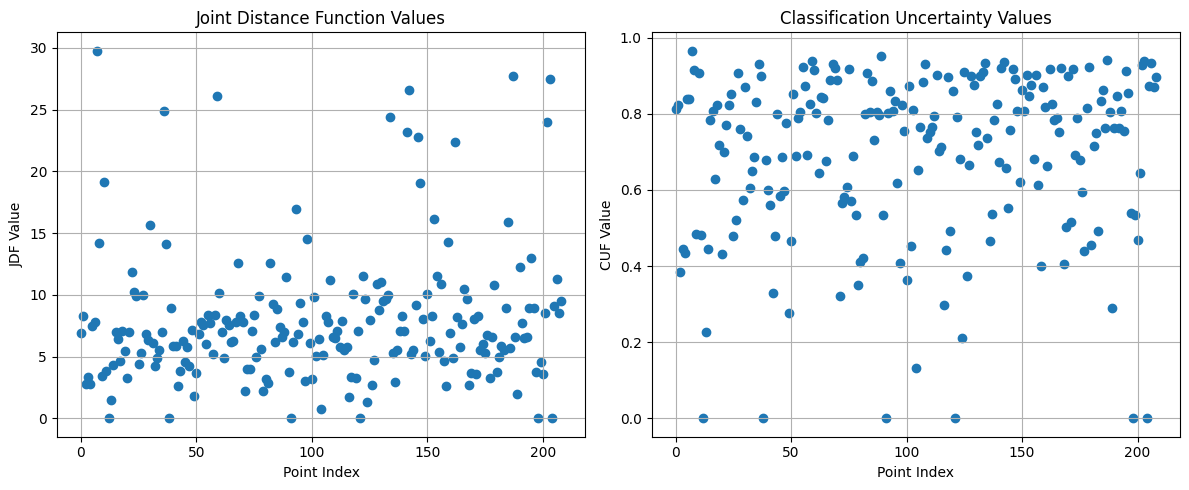

Optimized Centroids:
Centroid 1: (17.679243, 43.915848)
Centroid 2: (48.516107, 15.552724)
Centroid 3: (12.354646, 7.369751)
Centroid 4: (-77.297525, 18.109458)
Centroid 5: (-61.226471, 13.158660)
Centroid 6: (95.956034, 21.913798)

Cluster Membership Probabilities:

Point 1: [ 1.601554 42.546245]
  Probability for Centroid 1: 0.4288
  Probability for Centroid 2: 0.1278
  Probability for Centroid 3: 0.1881
  Probability for Centroid 4: 0.0838
  Probability for Centroid 5: 0.0998
  Probability for Centroid 6: 0.0716

Point 2: [67.709953 33.93911 ]
  Probability for Centroid 1: 0.1625
  Probability for Centroid 2: 0.3120
  Probability for Centroid 3: 0.1350
  Probability for Centroid 4: 0.0568
  Probability for Centroid 5: 0.0635
  Probability for Centroid 6: 0.2701

Point 3: [-61.796428  17.060816]
  Probability for Centroid 1: 0.0332
  Probability for Centroid 2: 0.0253
  Probability for Centroid 3: 0.0373
  Probability for Centroid 4: 0.1795
  Probability for Centroid 5: 0.7071
  Prob

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy.spatial import Voronoi, voronoi_plot_2d

def euclidean_distance(p1, p2):
    """Calculate Euclidean distance between two points"""
    return np.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

def calculate_probabilities(points, centroids):
    """
    Update cluster membership probabilities using equation (13)
    """
    K = len(centroids)
    N = len(points)
    probabilities = np.zeros((N, K))

    for i in range(N):
        distances = [euclidean_distance(points[i], c) for c in centroids]

        # Handle case where point coincides with a centroid
        if min(distances) < 1e-10:
            probabilities[i] = np.zeros(K)
            probabilities[i][np.argmin(distances)] = 1.0
            continue

        denominator = 0.0
        numerators = []

        for k in range(K):
            # Calculate numerator: product of distances to other centroids
            numerator = 1.0
            for j in range(K):
                if j != k:
                    numerator *= distances[j]
            numerators.append(numerator)
            denominator += numerator

        for k in range(K):
            probabilities[i, k] = numerators[k] / denominator

    return probabilities

def calculate_jdf(points, centroids):
    """
    Calculate Joint Distance Function (equation 21)
    """
    K = len(centroids)
    N = len(points)
    jdf_values = np.zeros(N)

    for i in range(N):
        distances = [euclidean_distance(points[i], c) for c in centroids]
        numerator = np.prod(distances)
        denominator = 0.0

        for k in range(K):
            term = 1.0
            for m in range(K):
                if m != k:
                    term *= distances[m]
            denominator += term

        if denominator > 0:
            jdf_values[i] = numerator / denominator

    return jdf_values

def calculate_cuf(points, centroids, probabilities):
    """
    Calculate Classification Uncertainty Function (equation 27)
    """
    K = len(centroids)
    N = len(points)
    cuf_values = np.zeros(N)

    for i in range(N):
        if K == 1:
            cuf_values[i] = 0.0
            continue

        # Using equation (27): geometric mean of probabilities
        product = np.prod(probabilities[i, :])
        cuf_values[i] = K * (product ** (1/K))

    return cuf_values

def generalized_weiszfeld(points, weights, initial_centroids, max_iter=1000, tol=1e-6):
    """
    Generalized Weiszfeld method for multi-facility location (Algorithm 1)

    Parameters:
    - points: list of (latitude, longitude) tuples
    - weights: list of weights for each point
    - initial_centroids: list of initial (latitude, longitude) centroids
    - max_iter: maximum number of iterations
    - tol: convergence tolerance

    Returns:
    - optimized centroids
    - probability matrix
    - JDF values
    - CUF values
    - objective function values
    """
    K = len(initial_centroids)
    N = len(points)
    centroids = initial_centroids.copy()
    objective_values = []

    # Create initial visualization
    fig1 = plt.figure(figsize=(15, 10))
    ax1 = plt.axes(projection=ccrs.PlateCarree())
    ax1.add_feature(cfeature.LAND)
    ax1.add_feature(cfeature.OCEAN)
    ax1.add_feature(cfeature.COASTLINE)
    ax1.add_feature(cfeature.BORDERS, linestyle=':')
    ax1.set_global()

    # Plot initial state
    initial_lons, initial_lats = zip(*initial_centroids)
    ax1.scatter(initial_lons, initial_lats, color='red', s=100,
               marker='X', label='Initial Centroids', transform=ccrs.PlateCarree())

    point_lons, point_lats = zip(*points)
    ax1.scatter(point_lons, point_lats, color='blue', s=50,
               label='Data Points', transform=ccrs.PlateCarree())

    plt.title('Initial State: Data Points and Centroids', fontsize=14)
    plt.legend()
    plt.show()

    # Main optimization loop
    for iteration in range(max_iter):
        # Step 1: Compute distances (implicit in probability calculation)
        # Step 2: Compute probabilities (equation 13)
        probabilities = calculate_probabilities(points, centroids)

        # Step 3: Update centers (equations 18a-18b)
        new_centroids = []
        for k in range(K):
            current_centroid = centroids[k]

            # Check if current centroid is a data point (equation 18b)
            is_data_point = any(np.allclose(current_centroid, p) for p in points)
            if is_data_point:
                new_centroids.append(current_centroid)
                continue

            # Calculate weights for convex combination (equation 17b)
            weights_sum = 0.0
            weighted_points = np.zeros(2)

            for i in range(N):
                dist = euclidean_distance(points[i], current_centroid)
                if dist > 1e-10:  # avoid division by zero
                    weight = (probabilities[i, k]**2 * weights[i]) / dist
                    weighted_points += weight * np.array(points[i])
                    weights_sum += weight

            if weights_sum > 0:
                new_centroid = weighted_points / weights_sum
            else:
                new_centroid = current_centroid

            new_centroids.append(tuple(new_centroid))

        # Calculate objective function value (equation 14)
        current_objective = 0.0
        for i in range(N):
            for k in range(K):
                dist = euclidean_distance(points[i], new_centroids[k])
                current_objective += probabilities[i, k]**2 * weights[i] * dist
        objective_values.append(current_objective)

        # Check for convergence
        converged = True
        for k in range(K):
            dist = euclidean_distance(centroids[k], new_centroids[k])
            if dist > tol:
                converged = False
                break

        centroids = new_centroids
        if converged:
            break

    # Final calculations
    probabilities = calculate_probabilities(points, centroids)
    jdf_values = calculate_jdf(points, centroids)
    cuf_values = calculate_cuf(points, centroids, probabilities)

    # Create final visualization
    fig2, (ax2, ax3) = plt.subplots(1, 2, figsize=(20, 8),
                                  subplot_kw={'projection': ccrs.PlateCarree()})

    # Plot 1: Cluster assignments
    for ax in (ax2, ax3):
        ax.add_feature(cfeature.LAND)
        ax.add_feature(cfeature.OCEAN)
        ax.add_feature(cfeature.COASTLINE)
        ax.add_feature(cfeature.BORDERS, linestyle=':')
        ax.set_global()

    # Color palette for clusters
    colors = plt.cm.tab10.colors

    # Plot data points with blended colors based on probabilities
    point_lons, point_lats = zip(*points)
    for i, (lon, lat) in enumerate(zip(point_lons, point_lats)):
        # Blend colors based on probabilities
        color = np.zeros(3)
        for k in range(K):
            color += np.array(colors[k % len(colors)][:3]) * probabilities[i, k]
        ax2.scatter(lon, lat, color=color, s=50, transform=ccrs.PlateCarree())

    # Plot final centroids
    centroid_lons, centroid_lats = zip(*centroids)
    for k, (lon, lat) in enumerate(zip(centroid_lons, centroid_lats)):
        ax2.scatter(lon, lat, color=colors[k % len(colors)], s=200,
                   marker='X', edgecolor='black', linewidth=1,
                   label=f'Centroid {k+1}', transform=ccrs.PlateCarree())

    ax2.set_title(f'Final Clusters', fontsize=14)
    ax2.legend()

    # Plot 2: Voronoi diagram
    # Convert to Cartesian coordinates for Voronoi diagram
    centroid_points = np.array(centroids)

    # Plot data points
    ax3.scatter(point_lons, point_lats, color='blue', s=30,
               transform=ccrs.PlateCarree())

    # Plot centroids
    ax3.scatter(centroid_lons, centroid_lats, color='red', s=100,
               marker='X', transform=ccrs.PlateCarree())

    # Create and plot Voronoi diagram
    vor = Voronoi(centroid_points)
    voronoi_plot_2d(vor, ax=ax3, show_points=False, show_vertices=False, line_colors='red')

    ax3.set_title('Voronoi Territories of Facilities', fontsize=14)

    plt.show()

    # Plot objective function convergence
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(objective_values)+1), objective_values, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Function Value')
    plt.title('Convergence of Objective Function')
    plt.grid(True)
    plt.show()

    # Plot JDF and CUF values
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(range(N), jdf_values)
    plt.xlabel('Point Index')
    plt.ylabel('JDF Value')
    plt.title('Joint Distance Function Values')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.scatter(range(N), cuf_values)
    plt.xlabel('Point Index')
    plt.ylabel('CUF Value')
    plt.title('Classification Uncertainty Values')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    return centroids, probabilities, jdf_values, cuf_values, objective_values

# Assuming equal weights for all points

# Initial centroids
initial_centroids = [
    (9.90205525,49.84300044),   # c1
    (87.33110993,43.68111316),  # c2
    (17.05291,2.07035),         # c3
    (-100.1666667,48.1666667),  # c4
    (-55.75,-15.4608333),        # c5
    (160,-10)
]

# Run the algorithm
optimized_centroids, probabilities, jdf_values, cuf_values, objectives = generalized_weiszfeld(
    points, weights, initial_centroids)

# Print results
print("Optimized Centroids:")
for i, (lat, lon) in enumerate(optimized_centroids):
    print(f"Centroid {i+1}: ({lat:.6f}, {lon:.6f})")

print("\nCluster Membership Probabilities:")
for i in range(len(points)):
    print(f"\nPoint {i+1}: {points[i]}")
    for k in range(len(optimized_centroids)):
        print(f"  Probability for Centroid {k+1}: {probabilities[i, k]:.4f}")

print("\nJoint Distance Function (JDF) Values:")
for i in range(len(points)):
    print(f"Point {i+1}: {jdf_values[i]:.4f}")

print("\nClassification Uncertainty Function (CUF) Values:")
for i in range(len(points)):
    print(f"Point {i+1}: {cuf_values[i]:.4f}")

print("\nFinal Objective Value:", objectives[-1])

Menghitung Indeks $Xie-Beni$

In [ ]:
def calculate_xie_beni_index(points, centroids, assignments, weights):
    """
    Calculate Xie-Beni index for cluster validity

    Parameters:
    - points: list of data points
    - centroids: list of cluster centroids
    - assignments: cluster assignments for each point
    - weights: weights for each data point

    Returns:
    - Xie-Beni index value
    """
    K = len(centroids)
    N = len(points)

    # Calculate WGSS (Within-Group Sum of Squares)
    wgss = 0.0
    for i in range(N):
        k = assignments[i]
        dist = euclidean_distance(points[i], centroids[k])
        wgss += weights[i] * (dist ** 2)

    # Calculate minimum inter-cluster distance
    min_inter_cluster_dist = float('inf')
    for k1 in range(K):
        for k2 in range(k1+1, K):
            dist = euclidean_distance(centroids[k1], centroids[k2])
            if dist < min_inter_cluster_dist:
                min_inter_cluster_dist = dist

    # Avoid division by zero
    if min_inter_cluster_dist < 1e-10:
        return float('inf')

    # Calculate Xie-Beni index (equation 109)
    xie_beni = (wgss / N) / (min_inter_cluster_dist ** 2)
    return xie_beni

# Modify the generalized_weiszfeld function to include Xie-Beni index
def generalized_weiszfeld(points, weights, initial_centroids, max_iter=1000, tol=1e-6):
    # ... [previous code remains the same until after convergence] ...

    # After convergence, calculate assignments for crisp clustering
    assignments = np.argmax(probabilities, axis=1)

    # Calculate Xie-Beni index
    xie_beni = calculate_xie_beni_index(points, initial_centroids, assignments, weights)
    print(f"\nXie-Beni Index: {xie_beni:.4f}")

    # ... [rest of the previous code remains the same] ...

    return centroids, probabilities, jdf_values, cuf_values, objectives, xie_beni

# Update the visualization to show Xie-Beni index
def plot_results(points, centroids, probabilities, objectives, xie_beni):
    # ... [previous visualization code] ...

    # Add Xie-Beni index to one of the plots
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(objectives)+1), objectives, marker='o')
    plt.xlabel('Iteration')
    plt.ylabel('Objective Function Value')
    plt.title(f'Convergence of Objective Function\nXie-Beni Index: {xie_beni:.4f}')
    plt.grid(True)
    plt.show()

# Update the main execution
optimized_centroids, probabilities, jdf_values, cuf_values, objectives, xie_beni = generalized_weiszfeld(
    points, weights, initial_centroids)

# Plot results with Xie-Beni index
plot_results(points, optimized_centroids, probabilities, objectives, xie_beni)


Xie-Beni Index: 0.9324


NameError: name 'centroids' is not defined